In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
from pylab import *
import specmatchemp.library
import specmatchemp.plots as smplot


In [3]:
wavlim=[5140,5200]
lib = specmatchemp.library.read_hdf(wavlim=wavlim)

Reading library from /home/kawahara/.specmatchemp/library.h5


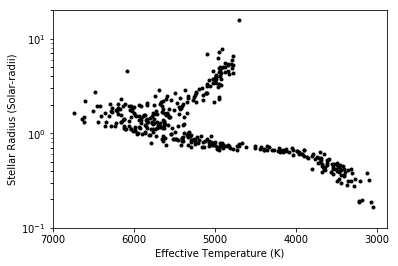

In [4]:
fig = figure()
plot(lib.library_params.Teff, lib.library_params.radius,'k.',)
smplot.label_axes('Teff','radius')


/home/kawahara/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


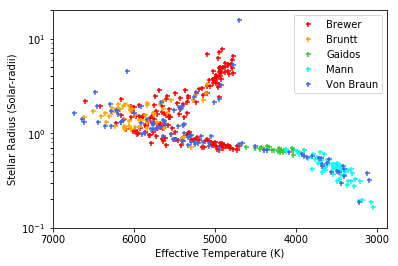

In [5]:
fig = figure()
g = lib.library_params.groupby('source')
colors = ['Red','Orange','LimeGreen','Cyan','RoyalBlue','Magenta','ForestGreen']
i = 0
for source, idx in g.groups.items():
    cut = lib.library_params.ix[idx]
    color = colors[i]
    plot(
        cut.Teff, cut.radius,'+', label=source, color=color, alpha=1, ms=5, 
        mew=1.5
    ) 
    i+=1
legend()
smplot.label_axes('Teff','radius')

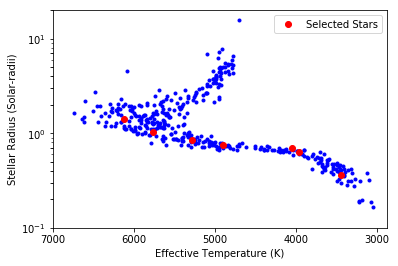

In [6]:
cut = lib.library_params.query('radius < 1.5 and -0.25 < feh < 0.25')
g = cut.groupby(pd.cut(cut.Teff,bins=arange(3000,7000,500)))
cut = g.first()

fig = figure()
plot(lib.library_params.Teff, lib.library_params.radius,'b.', label='_nolegend_')
plot(cut.Teff, cut.radius,'ro', label='Selected Stars')
legend()
smplot.label_axes('Teff','radius')
fig.savefig('quickstart-library-selected-stars.png')

Text(0,0.5,'Normalized Flux (Arbitrary Offset)')

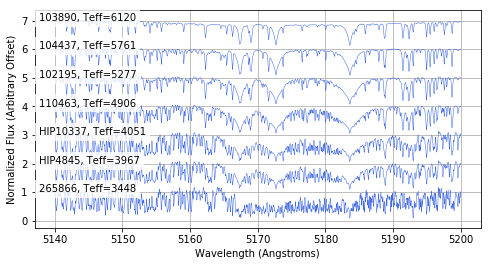

In [7]:
from matplotlib.transforms import blended_transform_factory
fig,ax = subplots(figsize=(8,4))
trans = blended_transform_factory(ax.transAxes,ax.transData)
bbox = dict(facecolor='white', edgecolor='none',alpha=0.8)
step = 1
shift = 0
for _,row in cut.iterrows():
    spec = lib.library_spectra[row.lib_index,0,:]
    plot(lib.wav,spec.T + shift,color='RoyalBlue',lw=0.5)
    s = "{cps_name:s}, Teff={Teff:.0f}".format(**row)    
    text(0.01, 1+shift, s, bbox=bbox, transform=trans)
    shift+=step

grid()
xlabel('Wavelength (Angstroms)')
ylabel('Normalized Flux (Arbitrary Offset)')

In [8]:
#idx1 = lib.get_index('190406')
#G_star = lib.pop(idx1)
#idx2 = lib.get_index('GL699')
#M_star = lib.pop(idx2)

In [11]:
from specmatchemp import spectrum
G_spectrum = spectrum.read_hires_fits('/home/kawahara/specmatch-emp/samples/rj59.1923.fits').cut(5130,5210)

In [13]:
np.shape(G_spectrum.w)

(4482,)

In [ ]:
#一次元化して.read_fitsでよもう

In [10]:
import read_hds as rh

In [20]:
wavlimin=[5130,5210]
fitsecf="/home/kawahara/hds/ana/o18113/H31064omlcs_ecfwr.fits"
blazedf="/home/kawahara/hds/ana/o18113/sBlazeB.fits"
wav,spec,specsn=rh.read_hdf_unblazed(fitsecf,blazedf,wavlim=wavlimin)
spec,mask=rh.medclipspec(spec)
#G_spectrum=rh.in_specmatch(wav,spec,specsn,mask=mask)
G_spectrum=rh.in_specmatch(wav[mask],spec[mask],specsn[mask])

the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/home/kawahara/hds/pyhds/read_hds.py:44: RuntimeWarning: invalid value encountered in sqrt
  return wav[ind[0]:ind[1]], normspec[ind[0]:ind[1]], np.sqrt(data)[ind[0]:ind[1]]


In [12]:
import matplotlib.pyplot as plt

Text(0,0.5,'Normalized Flux (Arbitrary Offset)')

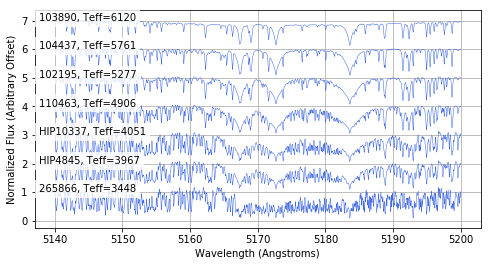

In [21]:
from matplotlib.transforms import blended_transform_factory
fig,ax = subplots(figsize=(8,4))
trans = blended_transform_factory(ax.transAxes,ax.transData)
bbox = dict(facecolor='white', edgecolor='none',alpha=0.8)
step = 1
shift = 0
for _,row in cut.iterrows():
    spec = lib.library_spectra[row.lib_index,0,:]
    plot(lib.wav,spec.T + shift,color='RoyalBlue',lw=0.5)
    s = "{cps_name:s}, Teff={Teff:.0f}".format(**row)    
    text(0.01, 1+shift, s, bbox=bbox, transform=trans)
    shift+=step

grid()
xlabel('Wavelength (Angstroms)')
ylabel('Normalized Flux (Arbitrary Offset)')

In [22]:
from specmatchemp.specmatch import SpecMatch
sm_G = SpecMatch(G_spectrum, lib)
sm_G.shift()

Shifting spectrum
Shifting spectrum Spectrum 2
Attempting shift to spectrum NSO, median cross-correlation peak = 1.97
Attempting shift to spectrum 123239, median cross-correlation peak = 2.02
Attempting shift to spectrum 222368, median cross-correlation peak = 1.04
Attempting shift to spectrum 216899, median cross-correlation peak = 0.88
Best reference for shifting: 123239
Shifting entire spectrum


(0, 2.2)

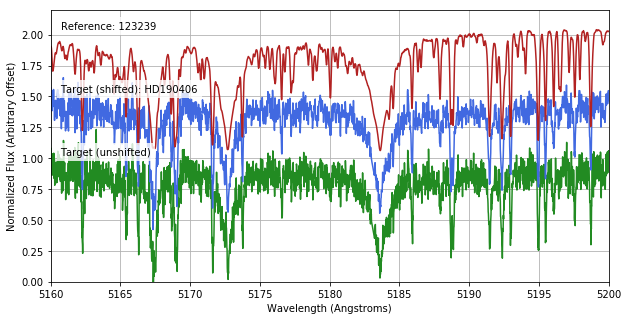

In [23]:
fig = plt.figure(figsize=(10,5))
sm_G.target_unshifted.plot(normalize=True, plt_kw={'color':'forestgreen'}, text='Target (unshifted)')
sm_G.target.plot(offset=0.5, plt_kw={'color':'royalblue'}, text='Target (shifted): HD190406')
sm_G.shift_ref.plot(offset=1, plt_kw={'color':'firebrick'}, text='Reference: '+sm_G.shift_ref.name)
plt.xlim(5160,5200)
plt.ylim(0,2.2)

In [24]:
sm_G.match(wavlim=(5140,5200))



Matching spectrum
Matching region (5140, 5200)


/home/kawahara/anaconda3/lib/python3.6/site-packages/lmfit-0.9.11-py3.6.egg/lmfit/minimizer.py:335: RuntimeWarning: divide by zero encountered in double_scalars


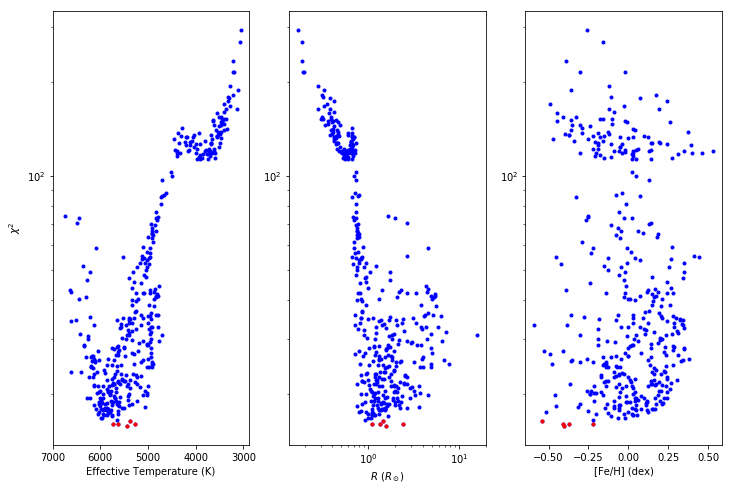

In [25]:
# Plot chi-squared surfaces
fig = figure(figsize=(12, 8))
sm_G.plot_chi_squared_surface()

In [26]:
sm_G.lincomb()

print('Derived Parameters: ')
print('Teff: {0:.0f}, Radius: {1:.2f}, [Fe/H]: {2:.2f}'.format(
    sm_G.results['Teff'], sm_G.results['radius'], sm_G.results['feh']))
#print('Library Parameters: ')
#print('Teff: {0:.0f}, Radius: {1:.2f}, [Fe/H]: {2:.2f}'.format(
#    G_star[0]['Teff'], G_star[0]['radius'], G_star[0]['feh']))

Creating linear combinations
Linear combinations in region (5140, 5200)
Derived Parameters: 
Teff: 5551, Radius: 1.51, [Fe/H]: -0.48


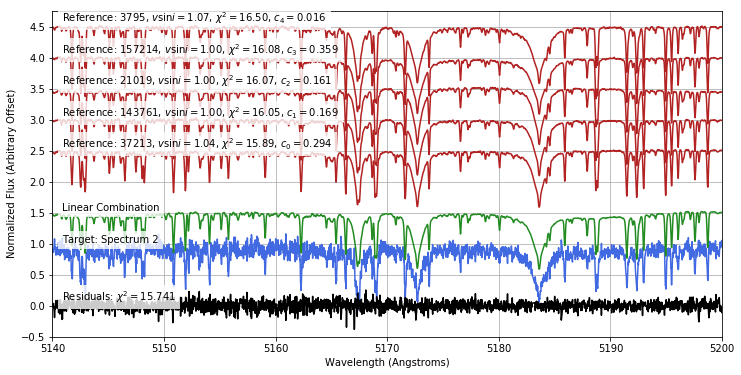

In [27]:
# Plot reference spectra and linear combinations
fig2 = plt.figure(figsize=(12,6))
sm_G.plot_lincomb()
plt.savefig("fitspecmatch.png")